## Introduction

>
>
>
>
>

Hi, and welcome to our CIS 545 Project! 

Our group members are :
- Kelly Liang
- Henry Hung
- Kun Hwi Ko

Today, we are here to do the following :

* Step 1 : Navigate through a movies dataset, and clean for necessary data 
* Step 2 : Visualize the data to get initial insights 
* Step 3 : Reformat the data to be compatible for machine learning 
* Step 4 : Use K-Means Clustering to forecast what movies users will like  

## Packages / Setup

In [90]:
# data cleaning and visualization packages 
import numpy as np 
import pandas as pd 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns  

# machine learning packages 
import sklearn


In [2]:
# Step 1 : install dependencies 
!pip install -q kaggle 

# Step 2 : create API Token from Kaggle and upload Kaggle.json 
# Instructions : https://www.kaggle.com/general/74235
from google.colab import files 
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kunhwiko","key":"ffde2dcdad62441bc64b6f73dbda3ec6"}'}

In [3]:
# Step 3: additional steps 
!mkdir ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4 : download the dataset 
# https://www.kaggle.com/rounakbanik/the-movies-dataset
!kaggle datasets download -d rounakbanik/the-movies-dataset

# Step 5 : Unzip the files 
!unzip the-movies-dataset.zip

 99% 225M/228M [00:10<00:00, 18.0MB/s]
100% 228M/228M [00:10<00:00, 23.3MB/s]


## Data Cleansing

In [183]:
# retrieve Kaggle data 
# use ratings_small as it has sufficient data 
keywords_df = pd.read_csv("/content/keywords.csv")
movies_df = pd.read_csv("/content/movies_metadata.csv")
ratings_df = pd.read_csv("/content/ratings_small.csv")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [184]:
# cleansing keywords_df

# Step 1 : get rid of rows without any keywords 
keywords_df = keywords_df[keywords_df['keywords'] != '[]']

# Step 2 : convert str --> [array of words]
def str_parser(strs):
  res = re.findall("name': '(.*?)'", strs)
  return res if res else None 

keywords_df['keywords'] = keywords_df['keywords'].apply(lambda x : str_parser(x))

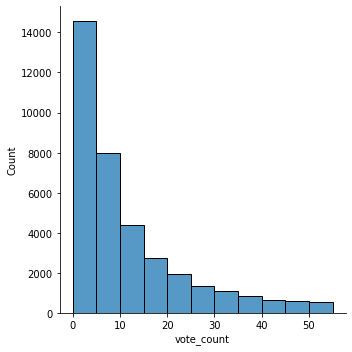

In [185]:
# cleansing movies_df

# Step 1 : drop unnecessary columns 
movies_df.drop(columns = ['adult', 'belongs_to_collection', 'budget', 'homepage', \
                          'imdb_id', 'original_language', 'original_title', 'overview', \
                          'poster_path', 'production_countries', 'release_date', 'revenue', \
                          'runtime', 'spoken_languages', 'status', 'tagline', 'video'], inplace = True)

# Step 2 : plot vote_count and decide what threshold to use to drop non-popular movies
sns.displot(movies_df, x = "vote_count", bins = [i for i in range(0, 60, 5)])
threshold = 5
movies_df = movies_df[movies_df['vote_count'] >= threshold]

# Step 3 : convert str --> [array of words]
movies_df['genres'] = movies_df['genres'].apply(lambda x : str_parser(x))
movies_df.dropna(inplace=True)

movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x : str_parser(x))
movies_df.dropna(inplace=True)

In [186]:
movies_df

,genres,id,popularity,production_companies,title,vote_average,vote_count
0,"[Animation, Comedy, Family]",862,21.9469,[Pixar Animation Studios],Toy Story,7.7,5415.0
1,"[Adventure, Fantasy, Family]",8844,17.0155,"[TriStar Pictures, Teitler Film, Interscope Co...",Jumanji,6.9,2413.0
2,"[Romance, Comedy]",15602,11.7129,"[Warner Bros., Lancaster Gate]",Grumpier Old Men,6.5,92.0
3,"[Comedy, Drama, Romance]",31357,3.85949,[Twentieth Century Fox Film Corporation],Waiting to Exhale,6.1,34.0
4,[Comedy],11862,8.38752,"[Sandollar Productions, Touchstone Pictures]",Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...
45451,"[Comedy, Fantasy]",106807,0.225432,[Star-Film],The Fat and Lean Wrestling Match,6.5,6.0
45453,"[Crime, Drama, Thriller]",404604,1.559596,"[Mad Films, Third Eye Pictures]",Mom,6.6,14.0
45456,"[Horror, Mystery, Thriller]",84419,0.222814,[Universal Pictures],House of Horrors,6.3,8.0
45460,"[Drama, Action, Romance]",30840,5.683753,"[Westdeutscher Rundfunk (WDR), Working Title F...",Robin Hood,5.7,26.0
